In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from random import shuffle
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, permutation_test_score
from CrossClassifier import CrossClassifier

# display plot inline
%matplotlib inline

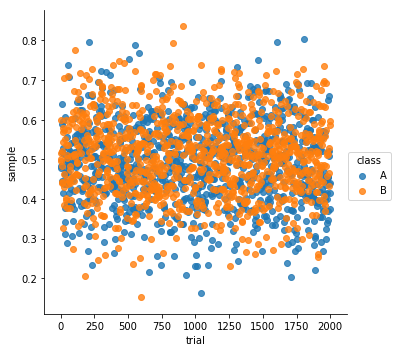

In [2]:
# task 1 data, narrow margin
n = 1000  # n per class
samples_A = list(np.random.normal(.49, .1, n))
samples_B = list(np.random.normal(.51, .1, n))
samples = samples_A + samples_B
labels_A = ['A'] * n
labels_B = ['B'] * n
labels = labels_A + labels_B
trials = range(n * 2)
shuffle(trials)
task_1 = zip(trials, labels, samples)
task_1 = pd.DataFrame(data=task_1, columns=['trial', 'class', 'sample'])
sns.lmplot('trial', 'sample', data=task_1, fit_reg=False, hue='class')

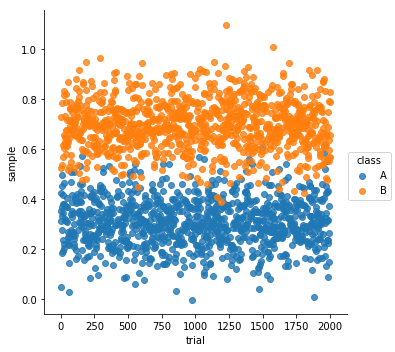

In [3]:
# task 2 data, narrow margin
n = 1000  # n per class
samples_A = list(np.random.normal(.3, .1, n))
samples_B = list(np.random.normal(.7, .1, n))
samples = samples_A + samples_B
labels_A = ['A'] * n
labels_B = ['B'] * n
labels = labels_A + labels_B
trials = range(n * 2)
shuffle(trials)
task_2 = zip(trials, labels, samples)
task_2 = pd.DataFrame(data=task_2, columns=['trial', 'class', 'sample'])
sns.lmplot('trial', 'sample', data=task_2, fit_reg=False, hue='class')

In [4]:
# train and test on task 1
clf = LinearSVC()
scores = cross_val_score(clf, task_1['sample'].values.reshape(-1, 1),
                         task_1['class'], cv=100)
print("Task 1 decoding accuracy: %0.2f (+/- %0.2f)" % (scores.mean(),
                                                       scores.std() * 2))

Task 1 decoding accuracy: 0.54 (+/- 0.20)


In [6]:
# train and test on task 2
clf = LinearSVC()
scores = cross_val_score(clf, task_2['sample'].values.reshape(-1, 1),
                         task_2['class'], cv=100)
print("Task 2 decoding accuracy: %0.2f (+/- %0.2f)" % (scores.mean(),
                                                       scores.std() * 2))

Task 2 decoding accuracy: 0.97 (+/- 0.06)


In [8]:
# train on task 2 and test on task 1
clf = LinearSVC()
cross_clf = CrossClassifier(clf, task_1['sample'].values.reshape(-1, 1), task_1['class'])
cross_clf.fit(task_2['sample'].values.reshape(-1, 1), task_2['class'])
scores = cross_val_score(cross_clf, task_2['sample'].values.reshape(-1, 1),
                         task_2['class'], cv=100)
print("Task 2 to task 1 cross-decoding accuracy: %0.2f (+/- %0.2f)" % (scores.mean(),
                                                       scores.std() * 2))

Task 2 to task 1 cross-decoding accuracy: 0.54 (+/- 0.00)


In [9]:
# train on task 1 and test on task 2
clf = LinearSVC()
cross_clf = CrossClassifier(clf, task_2['sample'].values.reshape(-1, 1), task_2['class'])
cross_clf.fit(task_1['sample'].values.reshape(-1, 1), task_1['class'])
scores = cross_val_score(cross_clf, task_1['sample'].values.reshape(-1, 1),
                         task_1['class'], cv=100)
print("Task 1 to task 2 cross-decoding accuracy: %0.2f (+/- %0.2f)" % (scores.mean(),
                                                       scores.std() * 2))

Task 1 to task 2 cross-decoding accuracy: 0.98 (+/- 0.00)


In [10]:
# train on task 2 and test on task 1
clf = LinearSVC()
cross_clf = CrossClassifier(clf, task_1['sample'].values.reshape(-1, 1), task_1['class'])
cross_clf.fit(task_2['sample'].values.reshape(-1, 1), task_2['class'])
scores, permutation_scores, pvalue = permutation_test_score(cross_clf, task_2['sample'].values.reshape(-1, 1),
                         task_2['class'], scoring='accuracy', cv=100, n_permutations=1000, n_jobs=1)
print("Task 2 to task 1 cross-decoding accuracy: %0.2f (+/- %0.2f)" % (scores.mean(),
                                                       scores.std() * 2))